# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data

The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

In [ ]:
import pandas as pd
import numpy as np
df_flights = pd.read_csv('/content/drive/MyDrive/Azure DS Certification/Create Machine Learning Models On Azure/Semana3/Challenges/Data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


## Imputacion
**A continuacion mostramos el total de datos faltantes dentro de todas las columnas**

Se puede ver que la unica columna con datos faltantes es la variable binaria **DepDel15** la cual esta asociada a la columna **DepDelay** la cual no cuenta con datos faltantes, por lo que nos es util para imputar los datos

In [ ]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

En esta muestra del conjunto de observaciones sin la variable binaria se puede observar que se cuenta con la variable **DepDelay** suficiente para rellenar los datos faltantes con datos **REALES**

In [ ]:
df_flights[df_flights.DepDel15.isnull()][['DepDelay', 'DepDel15']]

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


Al parecer esta relacionado a aquellos vuelos que salen a tiempo, por lo que el condicional para rellenar la siguiente columna se puede ver afectado

In [ ]:
for i,element in enumerate(df_flights['DepDelay']):
  if element > 15.0:
    df_flights['DepDel15'][i]=1.0
  else:
    df_flights['DepDel15'][i]=0.0

In [ ]:
df_flights[df_flights.DepDel15.isnull()].head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled


##Deteccion Outliers

Crearemos una funcion que se encargue de estudiar los atributos individualmente con solo introducir el dataframe y su respectiva comlumna



In [ ]:
from matplotlib import pyplot as plt
def Analisis_Rapido(objeto):
  #Algunos estadisticos
  min_val=objeto.min()
  max_val=objeto.max()
  mean_val=objeto.mean()
  med_val=objeto.median()
  #Solo queremos el escalar donde ocurre
  mod_val=objeto.mode()[0]
  print('El objeto', objeto.name,'Cuenta con un valor minimo de: {:.2f}, cuenta con una media: {:.2f} cuenta con una mediana de: {:.2f}, tiene como moda el valor: {:.2f} y un valor maximo de: {:.2f}'.format(min_val, mean_val,  med_val, mod_val, max_val))

  #Para cada atributo se mostraran 2 graficas
  fig,ax= plt.subplots(2,1 , figsize=(10,5))

  #Comenzando con un histograma
  ax[0].hist(objeto, color='black')
  ax[0].set_ylabel("Frecuencias")
  #ax[0].xlabel("Tiempo")
  #Trazamos una linea verticar donde ocurren los estadisticos anteriormente calculados
  ax[0].axvline(x=min_val, color = 'gray', linewidth = 2)
  ax[0].axvline(x=mean_val, color = 'cyan',  linewidth = 2)
  ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
  ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)
  ax[0].set_facecolor('grey')
  #axhline()
  #Ahora continuamos con un boxplot
  ax[1].boxplot(objeto, vert=False, notch=True, patch_artist=True)
  ax[1].set_xlabel('Tiempo')
  ax[1].set_facecolor('grey')
  #Agregamos el tituo del objeto utilizado
  # Add a title to the Figure
  fig.suptitle(objeto.name)
  # Show the figure
  fig.show()

El objeto DepDelay Cuenta con un valor minimo de: -63.00, cuenta con una media: 10.35 cuenta con una mediana de: -1.00, tiene como moda el valor: -3.00 y un valor maximo de: 1425.00


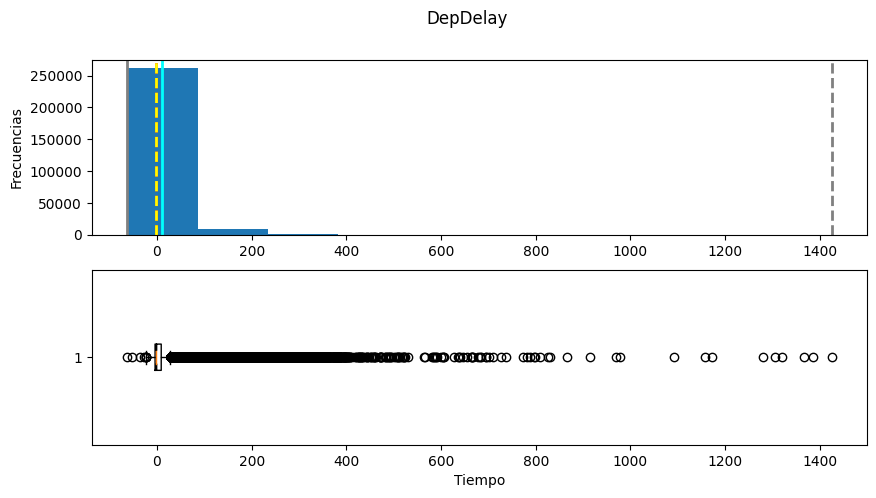

In [ ]:
Analisis_Rapido(df_flights['DepDelay'])

**El tiempo de retraso en el despegue se concentra en valores menores a 100 minutos, por lo que se tienen demasiados valores atipicos**

El objeto ArrDelay Cuenta con un valor minimo de: -75.00, cuenta con una media: 6.50 cuenta con una mediana de: -3.00, tiene como moda el valor: 0.00 y un valor maximo de: 1440.00


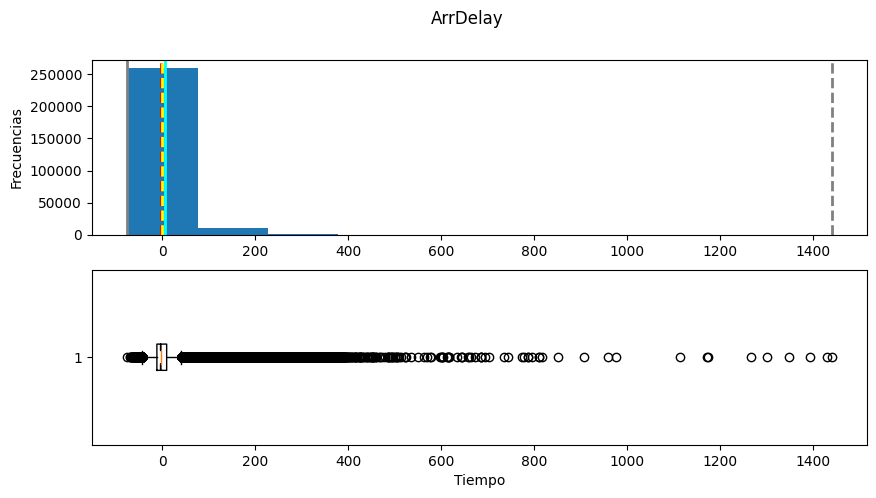

In [ ]:
Analisis_Rapido(df_flights['ArrDelay'])

**Ocurre algo bastante similar con los tiempos de retraso de llegada, concentrandose los valores en tiempos menores a 100 minutos por lo que habra que limpiar nuestros datos**

###Filtros

Considerare los datos que se encuentren como maximo a una distancia de una desviacion estandar del tiempo promedio de retraso de despegue

In [ ]:
condicion_1=(df_flights['DepDelay']>=(df_flights['DepDelay'].mean()-df_flights['DepDelay'].std()))
condicion_2=(df_flights['DepDelay']<=(df_flights['DepDelay'].mean()+df_flights['DepDelay'].std()))

In [ ]:
df_flights=df_flights[condicion_1 & condicion_2]

In [ ]:
print(df_flights.shape)
df_flights=df_flights.reset_index().drop(columns='index')

(250220, 20)


De forma similar, solo se consideraran las observaciones conun tiempo de retraso de llegada con una distancia maxima de una desviacion estandar del tiempo promedio de retraso

In [ ]:
condicion_3=(df_flights['ArrDelay']>=(df_flights['ArrDelay'].mean()-df_flights['ArrDelay'].std()))
condicion_4=(df_flights['ArrDelay']<=(df_flights['ArrDelay'].mean()+df_flights['ArrDelay'].std()))

In [ ]:
df_flights=df_flights[condicion_3 & condicion_4]

In [ ]:
print(df_flights.shape)
df_flights=df_flights.reset_index().drop(columns='index')

(189113, 20)


####Efecto de los filtros

El objeto DepDelay Cuenta con un valor minimo de: -24.00, cuenta con una media: 0.05 cuenta con una mediana de: -2.00, tiene como moda el valor: 0.00 y un valor maximo de: 46.00


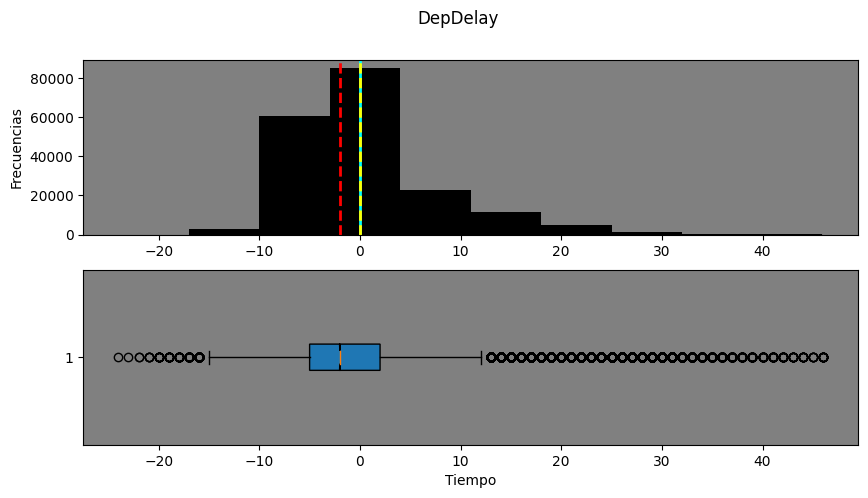

In [ ]:
Analisis_Rapido(df_flights['DepDelay'])

**Se observa un valor mucho mas controlado ademas de que puede representar el comportamiento real del servicio aereo fuera de situaciones extraordinarias**

El objeto ArrDelay Cuenta con un valor minimo de: -18.00, cuenta con una media: -4.02 cuenta con una mediana de: -5.00, tiene como moda el valor: 0.00 y un valor maximo de: 14.00


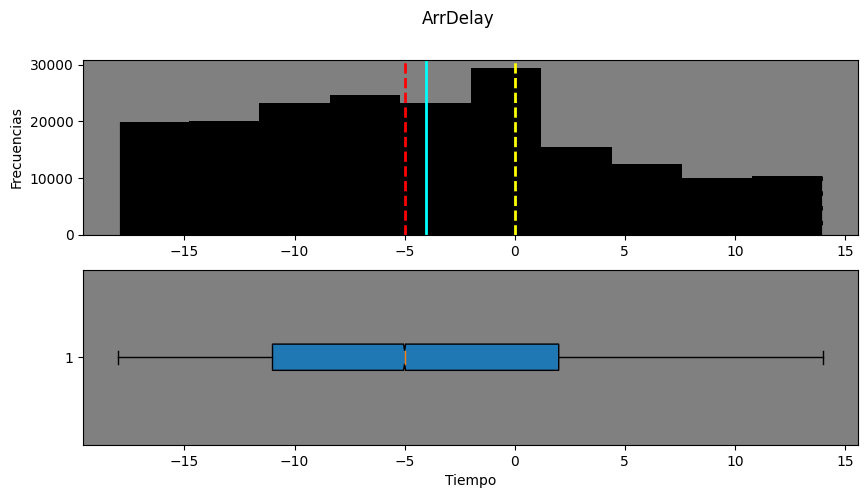

In [ ]:
Analisis_Rapido(df_flights['ArrDelay'])

**De forma similar, aparece un comportamiento mucho mas apegado a lo que podria ser un dia a dia de estos servicios aereos y no un conjunto de anomalias que pueden afectar el estudio.**

##Efecto de la aerolinea sobre las tardanzas

###Despegues

Mostramos un Boxplot el cual muestra los tiempos de retraso en los despegues tomando como referencia a la aerolinea como posible factor

<Axes: title={'center': 'DepDelay'}, xlabel='Carrier'>

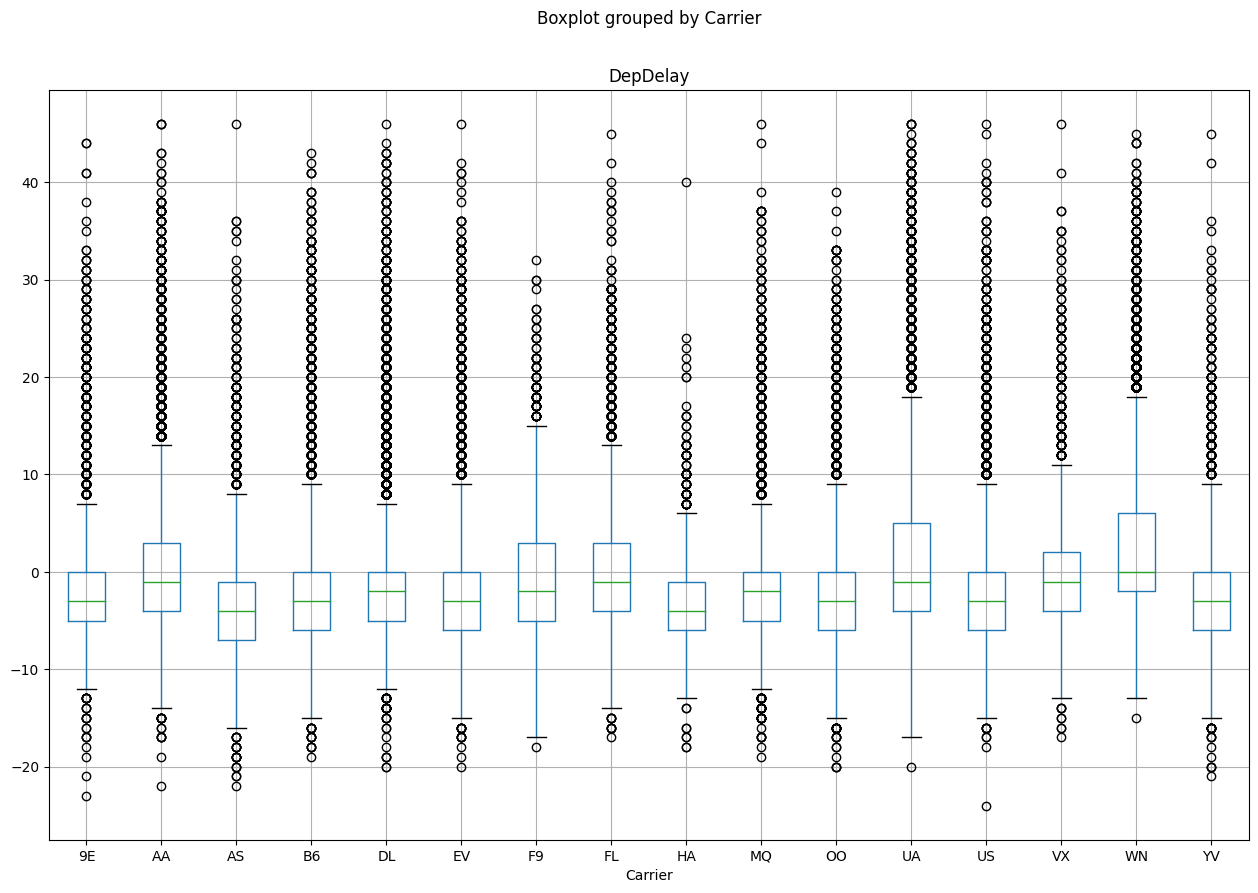

In [ ]:
df_flights.boxplot(column=['DepDelay'], by='Carrier', figsize=(15,10))

**Las aerolineas no parecen contar con una diferencia tan marcada en cuestion de tiempo de retrasos de los despegues, pero aerolineas como AA, F9, FL, UA y WN en sus vuelos mas del 50% de las ocasiones cuentan con este tipo de retrasos, mientras que el resto de aerolineas lo reducen a un menos del 25 % de ocasiones.**

###Aterrizajes

<Axes: title={'center': 'ArrDelay'}, xlabel='Carrier'>

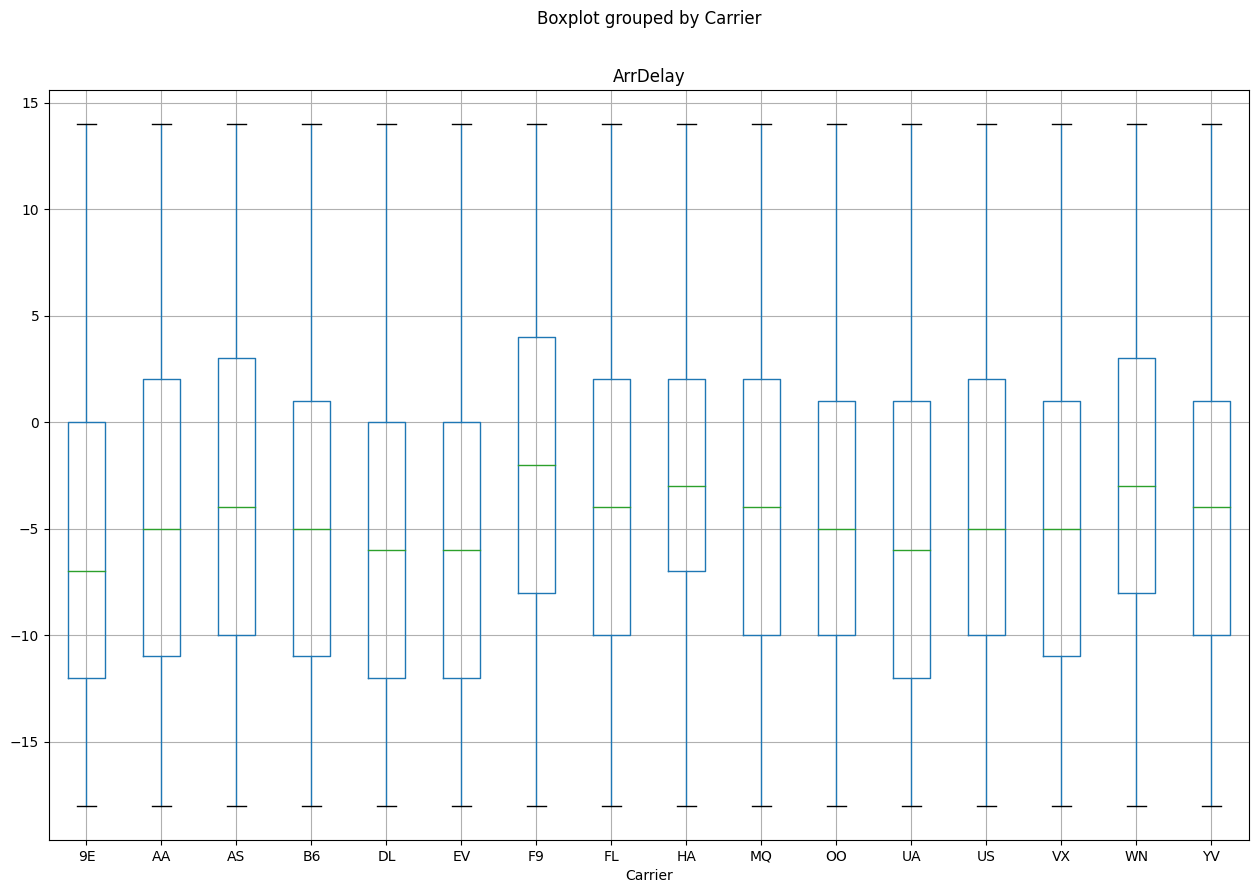

In [ ]:
df_flights.boxplot(column=['ArrDelay'], by='Carrier', figsize=(15,10))

**En general los tiempos de retraso en el aterrizaje parecen un fenomeno mas comun entre las aerolineas, ocurriendo en mas del 25% de las ocasiones para todas las aerolineas a excepcion de 9E, DL y EC**

## Efecto de los dias de la semana sobre los retraso

###Despegue

<Axes: title={'center': 'DepDelay'}, xlabel='DayOfWeek'>

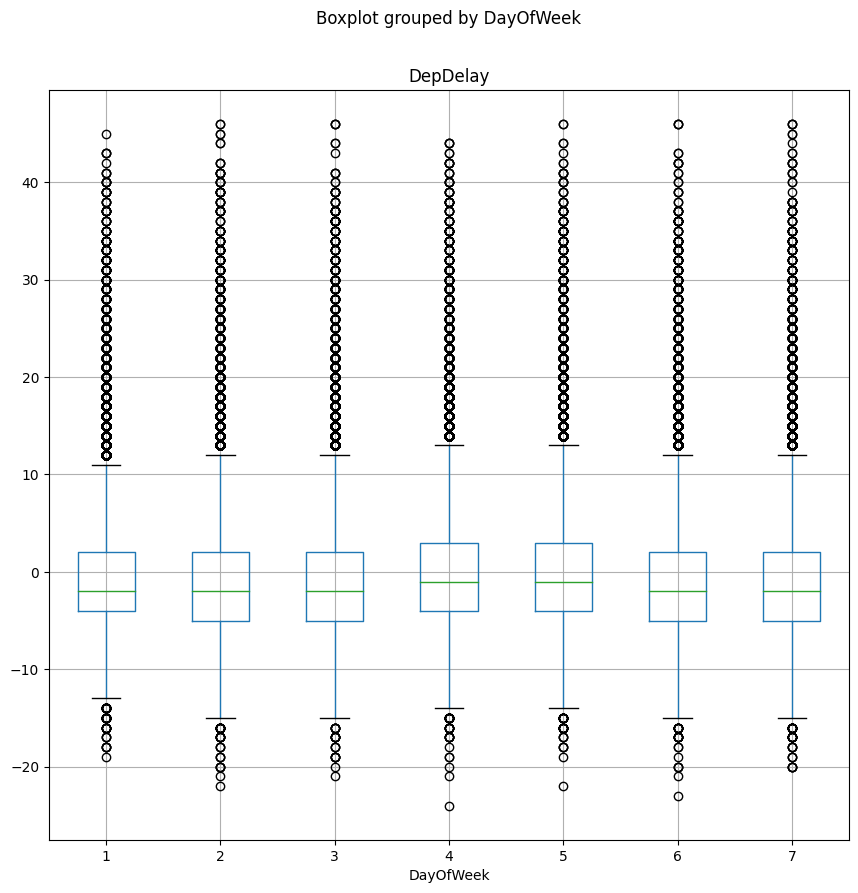

In [ ]:
df_flights.boxplot(column='DepDelay', by='DayOfWeek', figsize=(10,10))

**No parece que el dia en que se lleve a cabo el vuelo sea un factor sobre el tiempo de retraso en el despegue del avion**

###Aterrizaje

<Axes: title={'center': 'ArrDelay'}, xlabel='DayOfWeek'>

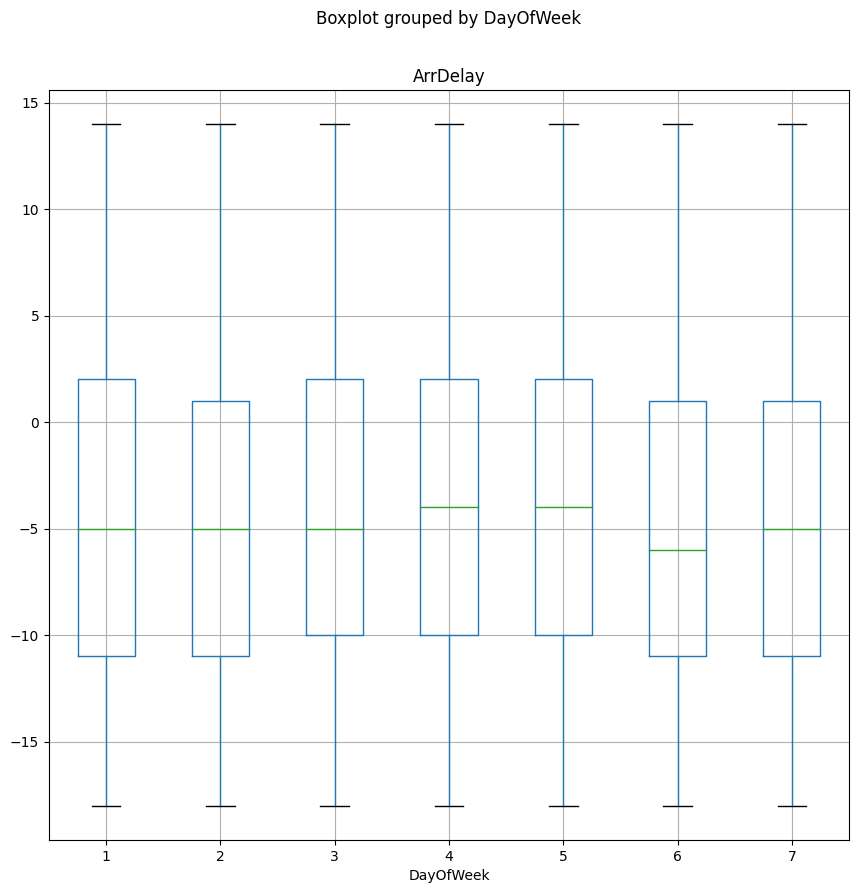

In [ ]:
df_flights.boxplot(column='ArrDelay', by='DayOfWeek', figsize=(10,10))

**De forma similar para el tiempo de retraso en aterrizaje, no parece que el dia en que se realiza el vuelo sea un factor para estudiar**

##Aeropuerto con el mayor tiempo de retraso promedio

In [ ]:
df_flights.groupby(['OriginAirportName']).mean()

<ipython-input-61-c12fd39bb62e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flights.groupby(['OriginAirportName']).mean()


,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
OriginAirportName,,,,,,,,,,,,,
Albuquerque International Sunport,2013.0,6.934239,15.686919,3.956397,10140.0,12714.147248,1202.066476,-0.092924,0.043603,1374.718370,-3.681916,0.007863,0.007863
Austin - Bergstrom International,2013.0,6.933809,15.727088,3.962831,10423.0,12376.491344,1199.748982,0.400204,0.045316,1389.178208,-4.112016,0.012220,0.012220
Baltimore/Washington International Thurgood Marshall,2013.0,6.997405,15.685698,3.886390,10821.0,12352.944637,1277.432814,2.011534,0.066032,1442.262976,-3.495098,0.012111,0.012111
Bob Hope,2013.0,6.861395,15.708333,3.875850,10800.0,13945.083333,1336.531463,-0.676871,0.038265,1478.200680,-4.456633,0.017007,0.017007
Bradley International,2013.0,6.989023,15.970362,3.951701,10529.0,12200.353458,1151.098793,0.025247,0.057080,1353.402854,-4.430296,0.010977,0.010977
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Theodore Francis Green State,2013.0,7.014062,15.451562,3.943750,14307.0,11945.012500,1162.143750,-0.618750,0.053125,1369.604687,-4.521875,0.007812,0.007812
Tucson International,2013.0,6.850847,16.180791,3.957062,15376.0,13035.707345,1074.257627,-2.900565,0.023729,1323.899435,-5.360452,0.006780,0.006780
Washington Dulles International,2013.0,7.088456,16.118532,3.937638,12264.0,12546.490491,1359.490491,0.276869,0.055285,1486.564352,-4.583812,0.022556,0.022556


*Tiempo promedio de retraso en el despegue para cada uno de los aeropuertos*

In [ ]:
df_flights.groupby(['OriginAirportName'])['DepDelay'].mean()

OriginAirportName
Albuquerque International Sunport                      -0.092924
Austin - Bergstrom International                        0.400204
Baltimore/Washington International Thurgood Marshall    2.011534
Bob Hope                                               -0.676871
Bradley International                                   0.025247
                                                          ...   
Theodore Francis Green State                           -0.618750
Tucson International                                   -2.900565
Washington Dulles International                         0.276869
Will Rogers World                                      -1.289896
William P Hobby                                         2.468035
Name: DepDelay, Length: 70, dtype: float64

Podemos obtener directamente aquel elemento donde ocurre el mayor tiempo promedio

In [ ]:
df_flights.groupby(['OriginAirportName'])['DepDelay'].mean().idxmax()

'Chicago Midway International'

Tambien podemos hacer la consulta y solicitar un ordenamiento, apareciendo el valor en el primer valor ordenando de forma descendente

In [ ]:
df_flights.groupby(['OriginAirportName']).mean().sort_values(by='DepDelay', ascending=False)

<ipython-input-60-49c73141f6b1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flights.groupby(['OriginAirportName']).mean().sort_values(by='DepDelay', ascending=False)


,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
OriginAirportName,,,,,,,,,,,,,
Chicago Midway International,2013.0,7.012747,15.512595,3.864340,13232.0,12635.272838,1280.800000,3.800000,0.100759,1467.210622,-2.270713,0.007587,0.007587
Dallas Love Field,2013.0,6.956238,15.827564,3.758981,11259.0,12614.303070,1243.519922,2.804050,0.054866,1361.419987,-0.951012,0.007185,0.007185
William P Hobby,2013.0,6.968269,15.713019,3.799813,12191.0,12211.833411,1262.928605,2.468035,0.069995,1431.982734,-2.400840,0.013999,0.013999
Baltimore/Washington International Thurgood Marshall,2013.0,6.997405,15.685698,3.886390,10821.0,12352.944637,1277.432814,2.011534,0.066032,1442.262976,-3.495098,0.012111,0.012111
Denver International,2013.0,7.083495,15.821359,3.979238,11292.0,13171.926064,1283.089320,1.901419,0.070351,1516.076774,-2.628081,0.008364,0.008364
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Richmond International,2013.0,6.994930,15.757921,3.866920,14524.0,11602.378961,1151.600760,-2.671736,0.034221,1306.038023,-5.712294,0.025349,0.025349
Ted Stevens Anchorage International,2013.0,7.147002,15.868472,4.071567,10299.0,14148.176015,985.400387,-2.773694,0.029014,1143.735010,-4.369439,0.005803,0.005803
Tucson International,2013.0,6.850847,16.180791,3.957062,15376.0,13035.707345,1074.257627,-2.900565,0.023729,1323.899435,-5.360452,0.006780,0.006780


In [ ]:
df_flights.groupby(['OriginAirportName']).mean().sort_values(by='DepDelay', ascending=False)['DepDelay']

<ipython-input-64-e41b20b11813>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flights.groupby(['OriginAirportName']).mean().sort_values(by='DepDelay', ascending=False)['DepDelay']


OriginAirportName
Chicago Midway International                            3.800000
Dallas Love Field                                       2.804050
William P Hobby                                         2.468035
Baltimore/Washington International Thurgood Marshall    2.011534
Denver International                                    1.901419
                                                          ...   
Richmond International                                 -2.671736
Ted Stevens Anchorage International                    -2.773694
Tucson International                                   -2.900565
Kahului Airport                                        -3.287846
Long Beach Airport                                     -3.376296
Name: DepDelay, Length: 70, dtype: float64

<ipython-input-66-71c572aeb643>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flights.groupby(['OriginAirportName']).mean().sort_values(by='DepDelay', ascending=False)['DepDelay'].plot(kind='bar', figsize=(10,10))


<Axes: xlabel='OriginAirportName'>

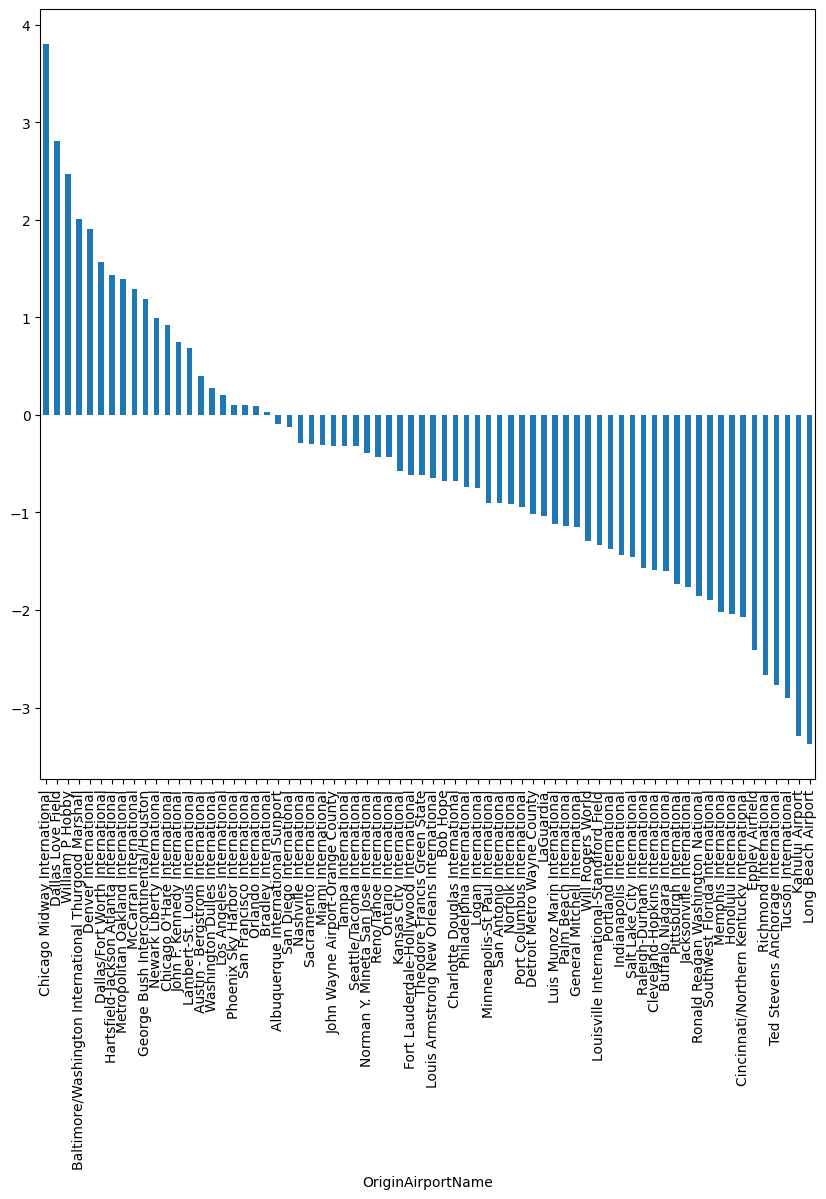

In [ ]:
df_flights.groupby(['OriginAirportName']).mean().sort_values(by='DepDelay', ascending=False)['DepDelay'].plot(kind='bar', figsize=(10,10))

##Efecto de despegar tarde sobre un aterrizaje atrasado

Un boxplot para mostrar los tiempos de retraso de acuerdo a si un vuelo despego o no tarde

<Axes: title={'center': 'ArrDelay'}, xlabel='DepDel15'>

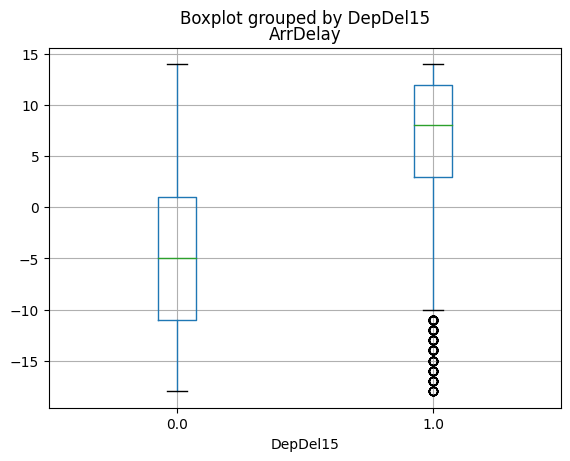

In [ ]:
df_flights.boxplot(column='ArrDelay', by='DepDel15')

**Se ve una clara tendencia a que cuando un vuelo despega tarde, genera un tiempo de retraso en el aterrizaje mayor a 0.**

## Ruta con el mayor numero de retrasos

In [ ]:
#Creamos un nuevo objeto que contiene las combinaciones posibles de las rutas, tomando pares (Aeropuerto Salida + Aeropuerto Llegada)
rutas=pd.Series(df_flights['OriginAirportName'] + ' --> ' + df_flights['DestAirportName'])
df_flights=pd.concat([df_flights, rutas.rename('Ruta')], axis=1)

In [ ]:
df_flights

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,...,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled,Ruta
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,...,New York,NY,1539,4,0.0,1824,13,0,0,Tampa International --> John F. Kennedy Intern...
1,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,...,Washington,DC,810,-3,0.0,1614,-7,0,0,Seattle/Tacoma International --> Ronald Reagan...
2,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,...,Atlanta,GA,545,-1,0.0,728,-9,0,0,Norfolk International --> Hartsfield-Jackson A...
3,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,...,Houston,TX,630,-1,0.0,1210,-3,0,0,Metropolitan Oakland International --> William...
4,2013,10,8,2,AA,13930,Chicago O'Hare International,Chicago,IL,11298,...,Dallas/Fort Worth,TX,1010,8,0.0,1240,-10,0,0,Chicago O'Hare International --> Dallas/Fort W...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189108,2013,7,5,5,WN,15304,Tampa International,Tampa,FL,10529,...,Hartford,CT,1100,2,0.0,1350,-10,0,0,Tampa International --> Bradley International
189109,2013,8,26,1,WN,11292,Denver International,Denver,CO,12191,...,Houston,TX,1855,-2,0.0,2215,0,0,0,Denver International --> William P Hobby
189110,2013,10,29,2,US,13930,Chicago O'Hare International,Chicago,IL,14100,...,Philadelphia,PA,1345,-6,0.0,1645,-11,0,0,Chicago O'Hare International --> Philadelphia ...
189111,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,...,Orlando,FL,1335,-7,0.0,1705,-12,0,0,Dallas/Fort Worth International --> Orlando In...


En este caso al ser una ruta, los tiempos de retraso los medire en base del si llego tarde o no a su destino, por lo que se usara la variable ArrDel15 (1 tarde, 0 si no)

In [ ]:
df_flights.groupby('Ruta').sum().sort_values(by='ArrDel15', ascending=False)

<ipython-input-99-64c2d75836ff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flights.groupby('Ruta').sum().sort_values(by='ArrDel15', ascending=False)


,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
Ruta,,,,,,,,,,,,,
San Francisco International --> Los Angeles International,1374879,4659,10756,2597,10088593,8805236,913463,-118,36.0,979540,-2246,44,44
Los Angeles International --> San Francisco International,1203774,4121,9184,2304,7709416,8833058,837210,33,26.0,899046,-2508,33,33
LaGuardia --> Chicago O'Hare International,499224,1771,3857,905,3212344,3454640,300839,-203,19.0,338766,-1721,23,23
LaGuardia --> Logan International,354288,1260,2722,598,2279728,1886896,226500,-890,1.0,245917,-979,22,22
Detroit Metro Wayne County --> Chicago O'Hare International,557601,1972,4417,1049,3166941,3858610,377872,-93,12.0,385756,-1103,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lambert-St. Louis International --> San Antonio International,52338,180,459,100,390416,381758,37755,84,0.0,43630,-81,0,0
Lambert-St. Louis International --> Salt Lake City International,78507,281,607,158,585624,579891,48264,-138,0.0,56437,-276,0,0
Lambert-St. Louis International --> Raleigh-Durham International,32208,111,294,46,240256,231872,23235,75,2.0,27535,-49,0,0


**La siguiente ruta cuenta con mas de 40 retrasos en sus registros**

In [ ]:
df_flights.groupby('Ruta').sum().sort_values(by='ArrDel15', ascending=False)['ArrDel15'].idxmax()

<ipython-input-106-205799a8cd6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flights.groupby('Ruta').sum().sort_values(by='ArrDel15', ascending=False)['ArrDel15'].idxmax()


'San Francisco International --> Los Angeles International'

##Ruta con el mayor tiempo promedio de retraso

Se hace uso ahora si de ArrDelay, el cual contiene los tiempo de retraso en cada una de las rutas.

In [ ]:
df_flights.groupby('Ruta').mean().sort_values(by='ArrDelay', ascending=False)

<ipython-input-108-078141344dea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_flights.groupby('Ruta').mean().sort_values(by='ArrDelay', ascending=False)


,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
Ruta,,,,,,,,,,,,,
Theodore Francis Green State --> Southwest Florida International,2013.0,5.00,18.0,6.0,14307.0,14635.0,1205.0,31.00,1.00,1515.0,12.0,0.0,0.0
Charlotte Douglas International --> General Mitchell International,2013.0,10.00,17.0,4.0,11057.0,13342.0,1440.0,26.00,1.00,1552.0,10.0,0.0,0.0
Port Columbus International --> Logan International,2013.0,7.00,1.0,1.0,11066.0,10721.0,1700.0,13.00,0.00,1904.0,7.0,0.0,0.0
Cleveland-Hopkins International --> Louis Armstrong New Orleans International,2013.0,5.25,16.5,5.5,11042.0,13495.0,886.5,3.75,0.25,1039.5,6.0,0.0,0.0
Jacksonville International --> Chicago Midway International,2013.0,10.00,21.5,1.5,12451.0,13232.0,1650.0,13.50,0.50,1820.0,6.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cleveland-Hopkins International --> Luis Munoz Marin International,2013.0,4.00,27.0,6.0,11042.0,14843.0,900.0,-5.00,0.00,1310.0,-15.0,0.0,0.0
Kahului Airport --> Ted Stevens Anchorage International,2013.0,4.00,5.0,5.0,13830.0,10299.0,1335.0,11.00,0.00,2146.0,-16.0,0.0,0.0
Southwest Florida International --> Buffalo Niagara International,2013.0,4.00,14.5,4.0,14635.0,10792.0,1647.5,-1.00,0.00,1938.5,-16.0,0.0,0.0


**La ruta con mayor tiempo promedio de retraso es Theodore Francis Green State --> Southwest Florida International con un promedio de 12 minutos**